In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('covid19_tweets.csv')

In [3]:
df = df[['user_name','user_location', 'user_created', 'user_followers', 'user_friends', 'user_favourites', 'user_verified', 'date', 'source', 'is_retweet']]
df.head()

,user_name,user_location,user_created,user_followers,user_friends,user_favourites,user_verified,date,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,Twitter for Android,False
3,ethel mertz,Stuck in the Middle,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,Twitter for Android,False


In [4]:
rows, columns = df.shape
print('Dataframe size')
print('Rows:', rows)
print('Columns:', columns)

Dataframe size
Rows: 179108
Columns: 10


In [5]:
print('Dataframe info')
df.info()

Dataframe info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   user_name        179108 non-null  object
 1   user_location    142337 non-null  object
 2   user_created     179108 non-null  object
 3   user_followers   179108 non-null  int64 
 4   user_friends     179108 non-null  int64 
 5   user_favourites  179108 non-null  int64 
 6   user_verified    179108 non-null  bool  
 7   date             179108 non-null  object
 8   source           179031 non-null  object
 9   is_retweet       179108 non-null  bool  
dtypes: bool(2), int64(3), object(5)
memory usage: 11.3+ MB


In [6]:
print('Dataframe description')
df.describe()

Dataframe description


,user_followers,user_friends,user_favourites
count,1.791080e+05,179108.000000,1.791080e+05
mean,1.090555e+05,2121.701566,1.444411e+04
std,8.414670e+05,9162.553072,4.452270e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.720000e+02,148.000000,2.060000e+02
50%,9.920000e+02,542.000000,1.791000e+03
75%,5.284000e+03,1725.250000,9.388000e+03
max,4.944256e+07,497363.000000,2.047197e+06


## Dataframe with cities

In [7]:
df_city = df
df_city = df_city.dropna(subset=['user_location'])

In [8]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142337 entries, 0 to 179107
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   user_name        142337 non-null  object
 1   user_location    142337 non-null  object
 2   user_created     142337 non-null  object
 3   user_followers   142337 non-null  int64 
 4   user_friends     142337 non-null  int64 
 5   user_favourites  142337 non-null  int64 
 6   user_verified    142337 non-null  bool  
 7   date             142337 non-null  object
 8   source           142285 non-null  object
 9   is_retweet       142337 non-null  bool  
dtypes: bool(2), int64(3), object(5)
memory usage: 10.0+ MB


In [9]:
df_city['city'] = ''
df_city.head()

<ipython-input-9-bb85e5a14570>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city['city'] = ''


,user_name,user_location,user_created,user_followers,user_friends,user_favourites,user_verified,date,source,is_retweet,city
0,ᏉᎥ☻լꂅϮ,astroworld,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,Twitter for iPhone,False,
1,Tom Basile 🇺🇸,"New York, NY",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Twitter for Android,False,
2,Time4fisticuffs,"Pewee Valley, KY",2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,Twitter for Android,False,
3,ethel mertz,Stuck in the Middle,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,Twitter for iPhone,False,
4,DIPR-J&K,Jammu and Kashmir,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,Twitter for Android,False,


In [10]:
df_city = df_city.dropna(subset=['user_location'])

In [11]:
#New York
ny_search_values = ['nyc', 'new york', 'bronx', 'queens', 'manhattan', 'brooklyn', 'staten island']
df_city.loc[df_city.user_location.str.contains('|'.join(ny_search_values), case=False), 'city'] = 'New York'


In [12]:
#Berlin
search_values = ['berlin']
df_city.loc[df_city.user_location.str.contains('|'.join(search_values), case=False), 'city'] = 'Berlin'

In [13]:
#Los Angeles
search_values = ['los angeles', 'hollywood', 'pasadena', 'beverly hills', 'santa monica', 'the valley', 'lax', 'westside', ]
df_city.loc[df_city.user_location.str.contains('|'.join(search_values), case=False), 'city'] = 'Los Angeles'
df_city.loc[df_city.user_location=='LA', 'city'] = 'Los Angeles'

In [14]:
#London
search_values = ['london']
df_city.loc[df_city.user_location.str.contains('|'.join(search_values), case=False), 'city'] = 'London'

In [15]:
df_city = df_city[df_city['city'].map(len) > 0]
df_city.head()

,user_name,user_location,user_created,user_followers,user_friends,user_favourites,user_verified,date,source,is_retweet,city
1,Tom Basile 🇺🇸,"New York, NY",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Twitter for Android,False,New York
27,beatnikgeek the soothsayer,"Manhattan, NY",2008-02-23 19:02:29,86,259,9412,False,2020-07-25 12:26:26,Twitter for Android,False,New York
56,Barry Grodenchik,"Queens, NY",2012-11-23 16:51:09,4868,445,31825,False,2020-07-25 12:25:30,Twitter for Android,False,New York
66,Matty A,"New York, NY USA",2014-02-01 21:44:37,3924,4487,93575,False,2020-07-25 12:25:20,Twitter Web App,False,New York
88,Martin King,London,2007-10-16 20:14:56,1799,74,5674,False,2020-07-25 12:24:38,Twitter Web App,False,London


In [16]:
city_data = df_city['city'].value_counts().reset_index().rename(columns={'city':'tweet_counts', 'index':'city'})

In [17]:
city_data

,city,tweet_counts
0,London,4529
1,New York,4299
2,Los Angeles,1651
3,Berlin,286


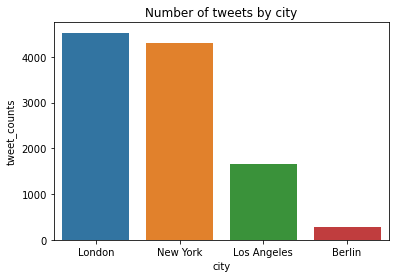

In [18]:
plt.title('Number of tweets by city')
sns.barplot(x = city_data['city'], y = city_data['tweet_counts'])

## By time

### Activity of tweets by days

In [19]:
df_date = df
df_date['date'] = pd.to_datetime(df_date['date'])

In [20]:
df_date.head()

,user_name,user_location,user_created,user_followers,user_friends,user_favourites,user_verified,date,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,Twitter for Android,False
3,ethel mertz,Stuck in the Middle,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,Twitter for Android,False


In [21]:
df_date['month_day'] = df_date['date'].dt.month.astype('str')+'-'+df_date['date'].dt.day.astype('str')

In [22]:
date_data = df_date['month_day'].value_counts().reset_index().rename(columns={'month_day':'tweet_counts', 'index':'month_day'})

In [23]:
date_data = date_data.sort_values('month_day')

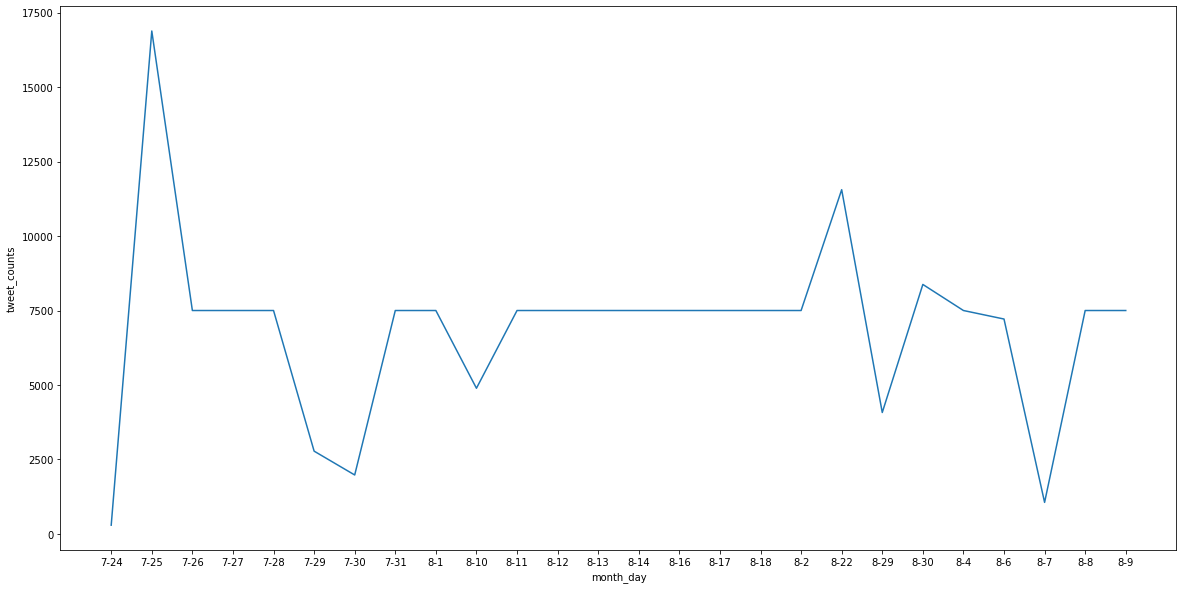

In [24]:
plt.figure(figsize=(20,10))
sns.lineplot(data=date_data, x='month_day', y='tweet_counts')

### Activity of registering in Twitter by years

In [25]:
df_date = df
df_date['user_created'] = pd.to_datetime(df_date['user_created'])

In [26]:
df_date['user_created_year'] = df_date['user_created'].dt.year

In [27]:
date_data = df_date['user_created_year'].value_counts().reset_index().rename(columns={'user_created_year':'tweet_counts', 'index':'user_created_year'})

In [28]:
date_data = date_data.sort_values('user_created_year')

In [29]:
date_data = date_data[date_data['user_created_year'] >= 2006]

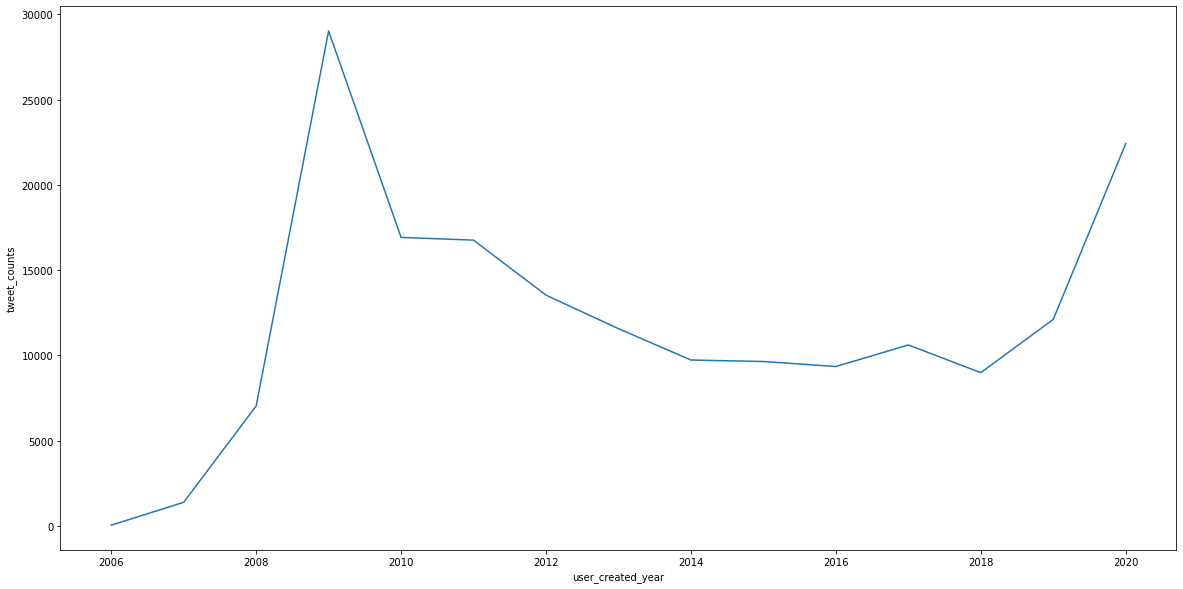

In [30]:
plt.figure(figsize=(20,10))
sns.lineplot(data=date_data, x='user_created_year', y='tweet_counts')

### Activity of tweets by day of week

In [31]:
df_date = df
df_date['date'] = pd.to_datetime(df_date['date'])

In [32]:
df_date['week_day_num'] = df_date['date'].dt.dayofweek

In [33]:
df_date.head()

,user_name,user_location,user_created,user_followers,user_friends,user_favourites,user_verified,date,source,is_retweet,month_day,user_created_year,week_day_num
0,ᏉᎥ☻լꂅϮ,astroworld,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,Twitter for iPhone,False,7-25,2017,5
1,Tom Basile 🇺🇸,"New York, NY",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Twitter for Android,False,7-25,2009,5
2,Time4fisticuffs,"Pewee Valley, KY",2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,Twitter for Android,False,7-25,2009,5
3,ethel mertz,Stuck in the Middle,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,Twitter for iPhone,False,7-25,2019,5
4,DIPR-J&K,Jammu and Kashmir,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,Twitter for Android,False,7-25,2017,5


In [34]:
date_data = df_date['week_day_num'].value_counts().reset_index().rename(columns={'week_day_num':'tweet_counts', 'index':'week_day_num'})

In [35]:
date_data = date_data.sort_values('week_day_num')

In [36]:
def change_weekday(day):
    dd = {
        0: 'Monday',
        1: 'Tuesday',
        2: 'Wednesday',
        3: 'Thursday',
        4: 'Friday',
        5: 'Saturday',
        6: 'Sunday'
    }
    return(dd[day])

In [37]:
print(change_weekday(0))

Monday


In [38]:
date_data['week_day_num']=date_data['week_day_num'].apply(lambda x: change_weekday(x))

In [39]:
date_data

,week_day_num,tweet_counts
3,Monday,19891
2,Tuesday,30000
6,Wednesday,10280
4,Thursday,16694
5,Friday,16355
0,Saturday,47513
1,Sunday,38375


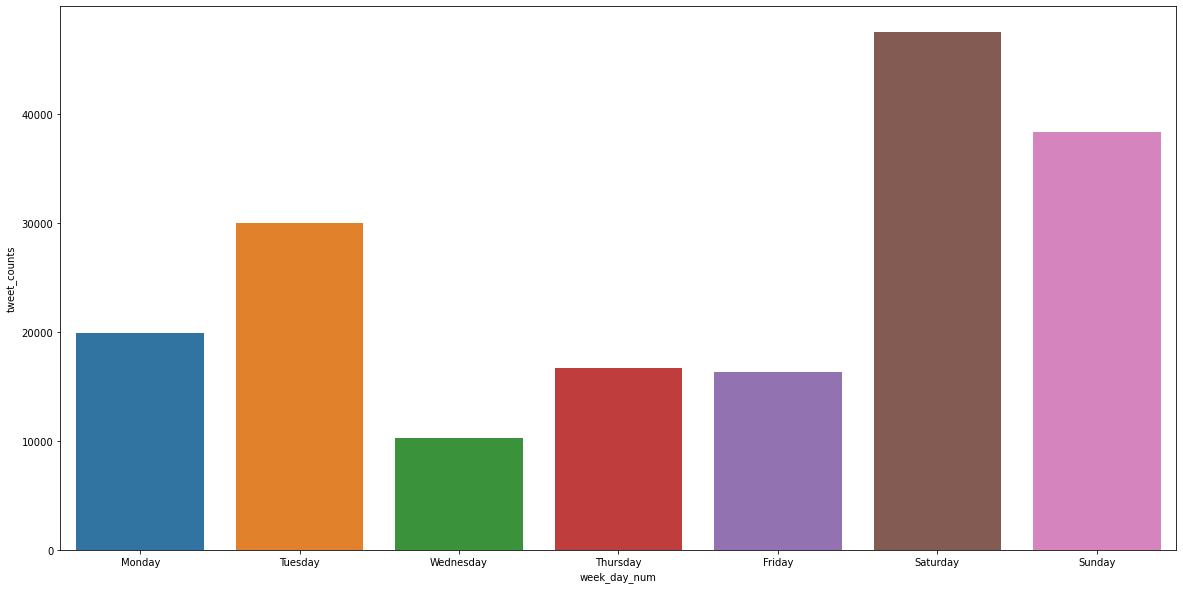

In [69]:
plt.figure(figsize=(20,10))
sns.barplot(data=date_data, x='week_day_num', y='tweet_counts')

## Grouping by time and city

In [41]:
df_city_day = df_city
df_city_day.head()

,user_name,user_location,user_created,user_followers,user_friends,user_favourites,user_verified,date,source,is_retweet,city
1,Tom Basile 🇺🇸,"New York, NY",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Twitter for Android,False,New York
27,beatnikgeek the soothsayer,"Manhattan, NY",2008-02-23 19:02:29,86,259,9412,False,2020-07-25 12:26:26,Twitter for Android,False,New York
56,Barry Grodenchik,"Queens, NY",2012-11-23 16:51:09,4868,445,31825,False,2020-07-25 12:25:30,Twitter for Android,False,New York
66,Matty A,"New York, NY USA",2014-02-01 21:44:37,3924,4487,93575,False,2020-07-25 12:25:20,Twitter Web App,False,New York
88,Martin King,London,2007-10-16 20:14:56,1799,74,5674,False,2020-07-25 12:24:38,Twitter Web App,False,London


In [42]:
df_city_day['date'] = pd.to_datetime(df_city_day['date'])

In [43]:
df_city_day['week_day_num'] = df_city_day['date'].dt.dayofweek

In [44]:
df_city_day = df_city_day[['city', 'week_day_num', 'user_name']]

df_city_day = df_city_day.groupby(['week_day_num', 'city']).count()

In [45]:
df_city_day = df_city_day.reset_index().rename(columns={'week_day_num':'week_day_num', 'city':'city', 'user_name':'tweet_count'})

In [46]:
df_city_day['week_day_num']=df_city_day['week_day_num'].apply(lambda x: change_weekday(x))

In [47]:
df_city_day

,week_day_num,city,tweet_count
0,Monday,Berlin,25
1,Monday,London,411
2,Monday,Los Angeles,182
3,Monday,New York,488
4,Tuesday,Berlin,52
5,Tuesday,London,799
6,Tuesday,Los Angeles,270
7,Tuesday,New York,662
8,Wednesday,Berlin,25
9,Wednesday,London,454


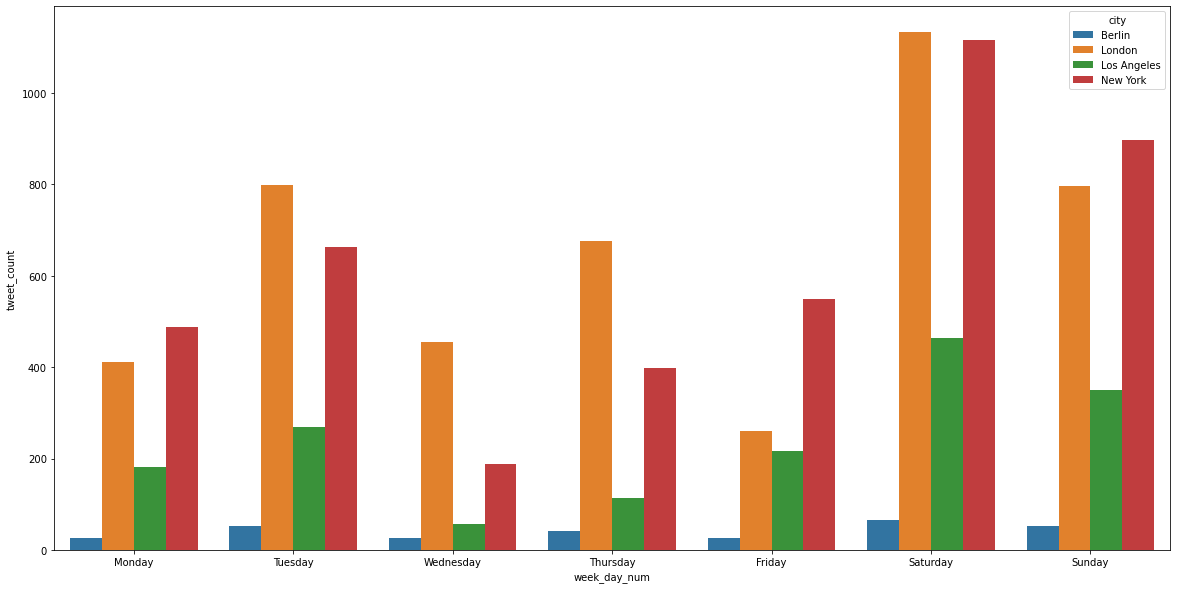

In [48]:
plt.figure(figsize=(20,10))
sns.barplot(x='week_day_num', y='tweet_count', hue='city', data=df_city_day)

In [57]:
df_city_overall_time = df_city

In [58]:
df_city_overall_time['date'] = pd.to_datetime(df_city_overall_time['date'])

In [59]:
df_city_overall_time['month_day'] = df_city_overall_time['date'].dt.month.astype('str')+'-'+df_city_overall_time['date'].dt.day.astype('str')

In [60]:
date_df_city_overall_time_data = df_city_overall_time[['city', 'month_day', 'user_name']]
date_df_city_overall_time_data = date_df_city_overall_time_data.groupby(['city', 'month_day']).count()
date_df_city_overall_time_data = date_df_city_overall_time_data.reset_index().rename(columns={'month_day':'month_day', 'city':'city', 'user_name':'tweet_count'})

In [61]:
date_df_city_overall_time_data

,city,month_day,tweet_count
0,Berlin,7-25,23
1,Berlin,7-26,8
2,Berlin,7-27,9
3,Berlin,7-28,11
4,Berlin,7-29,2
...,...,...,...
98,New York,8-4,169
99,New York,8-6,236
100,New York,8-7,53
101,New York,8-8,194


In [64]:
df_be=date_df_city_overall_time_data[date_df_city_overall_time_data.city=='Berlin']
df_la=date_df_city_overall_time_data[date_df_city_overall_time_data.city=='Los Angeles']
df_ny=date_df_city_overall_time_data[date_df_city_overall_time_data.city=='New York']
df_lo=date_df_city_overall_time_data[date_df_city_overall_time_data.city=='London']

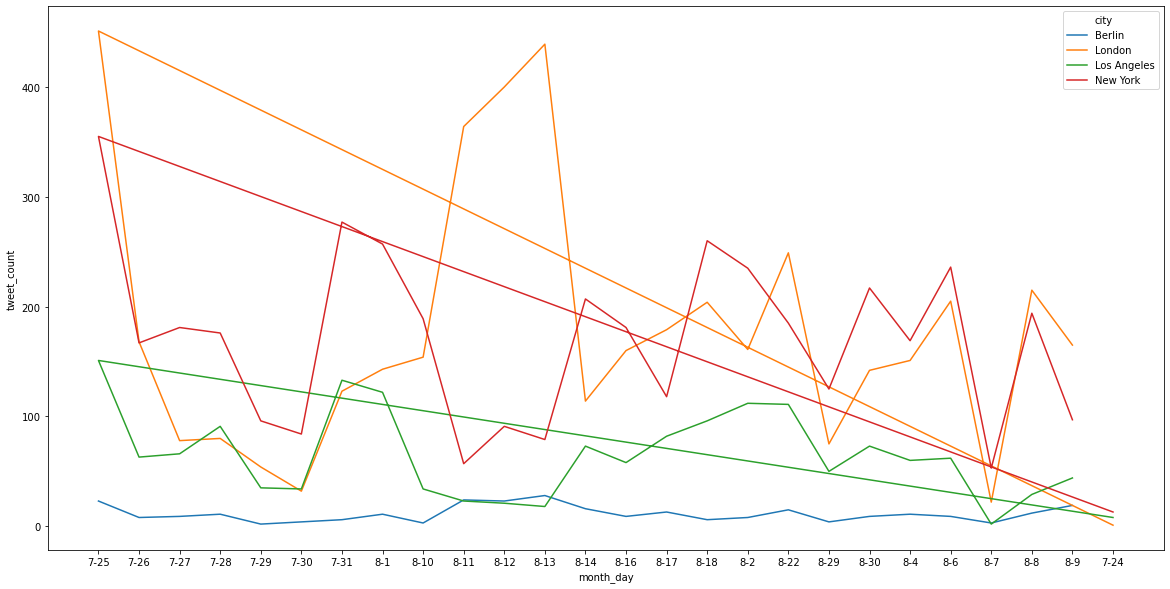

In [75]:
plt.figure(figsize=(20,10))
sns.lineplot(data=date_df_city_overall_time_data, x="month_day", y="tweet_count", hue="city")